<div style="background-color:rgba(20, 20, 20, 0.8); color:white; padding:10pt" >    

# **Lab Introduction to Image Processing**
&mdash; **`alain.lebret@ensicaen.fr`** &mdash;

### Part 1: Very basic operations, Color Spaces

</div>

## Dependencies

Three useful libraries for image processing must be preloaded: *NumPy*, *Scikit-image*, and *Matplotlib*.

*   [NumPy](https://www.numpy.org/) is a matrix computation library used for its linear algebra functions, Fourier transformations, and random number management.
*   [Scikit-image](https://scikit-image.org/) is the image processing library that we will use extensively in these labs.
*   [Matplotlib](https://matplotlib.org/) that you already know (although *OpenCV* has functions to display images, we will use *Matplotlib* to display them).

Other libraries that may be useful later include:
*   [OpenCV](https://docs.opencv.org/4.8.0/) is a library for computer vision tasks that includes most of the functions needed for image processing. The library will be loaded in Jupyter using the command: `!pip3 install opencv-python-headless`
*   [PIL](https://pillow.readthedocs.io/en/stable/) is a library comparable to *Scikit-image*, but object-oriented.
*   [Scikit-learn](https://scikit-learn.org/) is a learning library that we will revisit in AI.
*   [Pandas](https://pandas.pydata.org/) is a data manipulation and analysis library.

The *Scikit-image*, *cv2*, or *PIL* libraries can import or export several image formats that you might encounter throughout these labs:

-   BMP (_Microsoft Windows Bitmap_)
-   GIF (_Graphics Interchange Files_)
-   HDF (_Hierarchical Data Format_)
-   JPEG (_Joint Photographic Experts Group_)
-   PCX (_Paintbrush_)
-   PNG (_Portable Network Graphics_)
-   TIFF (_Tagged Image File Format_)
-   etc.

Note: If you prefer to use [Google Colab](https://colab.research.google.com) rather than installing [Jupyter-Lab](https://jupyter.org/install) locally on your personal computer, you must have a Google account and implement your access to your _Google Drive_ disk. Assuming your images are stored in the "resources" folder at the root of your _Google Drive_ disk, you will first need to mount it as follows:

```python
from google.colab import drive
drive.mount('/content/drive')
```

From there, your images will be accessible from the path: "`drive/My Drive/resources/`".

In [2]:
#
# Loads required libraries 
#
import skimage            # scikit-image
from skimage import data  # some images to use
from skimage import io    # open, write, etc. image files
from skimage import color # conversion between color spaces
from matplotlib import pyplot as plt

#
# Uncomments the lines below if using Google Colab
#
#from google.colab import drive

In [3]:
root_path = './ressources'
smaller = root_path + '/256x256'
medium = root_path + '/512x512'
various = root_path + '/divers'

## Introduction

Image processing encompasses a set of techniques aimed at enhancing, analyzing, or interpreting images. These techniques can range from simple color correction to more complex tasks such as object detection or pattern recognition. In the context of an artificial intelligence system dealing with images or videos, some of these methods can be implemented upstream to facilitate AI learning.

In the digital context, an image can either be a bitmap or a vector. Bitmap images are made up of a matrix of pixels, each pixel being the smallest element of an image. Each pixel contains values defining its color and brightness. Conversely, vector images do not rely on pixels but on geometric shapes such as points, lines, and curves. These shapes are defined by mathematical equations, allowing vector images to be resized without losing quality.

Digital images can be stored in many file formats. Formats such as BMP (previewed in the first year), JPEG, or PNG are suitable for bitmap images, while formats like SVG or EPS are designed for vector images. The choice of format often depends on the intended use of the image and whether or not to preserve details.

In these laboratory works, we focus on techniques applicable to bitmap images.

### Types of Images

There are three main types of images:

- **Grayscale images**: Each pixel can take a value which in most cases is between 0 (black) and 255 (white). These images provide a simplified representation of color images while retaining much of the visual information.
- **Color images**: They consist of several channels, usually red, green, and blue (sometimes an alpha channel). Each channel indicates the light intensity of its respective color for each pixel, with values again usually ranging between 0 and 255.
- **Binary images**: These images are composed of pixels having either the value 0 or the value 1. They are mainly used for object segmentation or shape recognition.

## 1. Basic operations on images

### Reading and displaying Images

Reading "image" files is done using the `imread()` function (from the "`io`" module of the _scikit-image_ library). The function takes as a parameter the path of an image stored locally or its URL if it is accessible on a network.
The data type returned by `imread()` is a matrix that depends on the type of image (grayscale images, color images, etc.). For example, the local file "leafs.jpg" located in the "various" subfolder of the "resources" folder can be read by entering:

```python
leafs = io.imread(various + '/leafs.jpg')
```

which will store the pixels of the image "leafs.jpg" in a 1350 x 900 x 3 matrix named leafs.

Now, the image can be visualized using the imshow() function (from the "pyplot" module of the Matplotlib library),
for example, by entering:

```python
fd1 = plt.figure(1)
plt.title("Leafs - original color image")
plt.imshow(leafs)
```

### Retrieving image features

The characteristics of an image can be accessed using its attributes `shape` (that informs on "width", "height" and "number of channels"), `size` ("number of pixels"), and `dtype` ("depth of channels").

```python
print('1) Read and display a local image\n')
leafs = io.imread(various + '/leafs.jpg')

print('Image coding: ', leafs.dtype)
print('Image size (height, width, channels): ', leafs.shape)
print('Number of pixels: ', leafs.size)

# Prepare the figure to be displayed
fd1 = plt.figure(1)
plt.imshow(leafs)
plt.title("Leafs - original color image")
print('\n')
```

It is also possible to read and display remote or internal images (using the `data` module from the scikit-image library):

```python
#
# Load and display a distant image
#
print('2) Read and display a distant image\n')
url = 'https://www.ensicaen.fr/wp-content/uploads/2017/03/LogoENSICAEN_institutionnel_couleurs.png'
logo = io.imread(url) 

print('Image coding: ', logo.dtype)
print('Image size (height, width, channels): ', logo.shape)

fd2 = plt.figure(2)
plt.title("Distant image: logo")
plt.imshow(logo)
print('\n')

#
# Load and display a library inner image
#
print('3) Read and display a scikit-image inner image\n')
astronaut = data.astronaut()

print('Image coding: ', astronaut.dtype)
print('Image size (height, width, channels): ', astronaut.shape)

fd3 = plt.figure(3)
plt.title("Internal image: astronaut")
plt.imshow(astronaut)
print('\n')
```

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.1**

1. Load and display a local image of your choice.
2. Load and display an image from the Web of your choice.
3. Load and display the internal image "coins" which contains Greek coins found in Pompeii (the image is obtained using the [`coins()`](https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.coins) function from the `data` module of the *Scikit-image* library).
4. Display the properties of the 3 images.

---
    
</div>

In [11]:
#
# TO COMPLETE WITH YOUR CODE
#


### Save an Image

Saving an image to a file is done using the [`imsave()`](https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imsave) function (from the `io` module of the *Scikit-image* library). For example, to save the previously encountered "astronaut" image locally in "PNG" format, the following instruction is used:

```python
io.imsave('astronaut.png', astronaut);
```

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.2**

1. Save locally the image "coins" obtained previously.

---
    
</div>

In [13]:
#
# TO COMPLETE WITH YOUR CODE
#


### Display Multiple Images on the Same Figure

It can be useful to display multiple images on the same figure. For this, the function [`add_subplot()`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot) will be used (from the `pyplot` module of the *Matplotlib* library):

```python
figure = plt.figure(figsize=(10, 10))

# 1st param: nb rows, 2nd param: nb columns, 3rd param: position
figure.add_subplot(1, 2, 1)
plt.title("leafs - original color image")
plt.imshow(leafs)

figure.add_subplot(1, 2, 2)
plt.title("leafs - gray image")
# We use the "gray" colormap to display image
plt.imshow(color.rgb2gray(leafs), cmap='gray')
```

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.3**

Place all the three images you previously loaded, as well as the "astronaut" image on the same figure (two on the first row and the other two on the next). Provide titles for each one.

---
    
</div>

In [14]:
#
# TO COMPLETE WITH YOUR CODE
#


### Grayscale and Color Images

#### Grayscale Images

`data.coins()` returns a grayscale image. A grayscale image is stored in a two-dimensional matrix (size: width $\times$ height), where the values represent the intensity of each pixel. This intensity is within the range \[0, 255\] for 8-bit images like the previous one, or \[0, 65536\] for 16-bit images such as DICOM format medical images.

> Note: It can sometimes be interesting to visualize grayscale images with a
> color palette indexed differently from the grayscale palette. These palettes
> are presented here: [colormaps.html](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

#### Color Images
The image returned by `data.astronaut()`, on the other hand, is a color image. This type of image is stored in three (or four) dimensional matrices (width $\times$ height $\times$ 3), allowing to store the intensity of each pixel within the range \[0, 255\] for each of the primary red, green, and blue (RGB) channels.

Extracting the three channels can be done using Python's matrix manipulation properties:

```python
# extraction of the red channel (0: blue, 1: green and 2: red)
red = astronaut[:,:,2]
```

Once operations are performed on each channel, they can be reassembled:

```python
output_image = np.zeros(astronaut.shape) # create a black color image  
output_image[:,:,2] = red
# etc.
```

##### Exemple

```python
#
# Split color image components using 
#
blue = astronaut[:,:,0]
green = astronaut[:,:,1]
red = astronaut[:,:,2]
figure = plt.figure(figsize=(15, 15))
figure.add_subplot(1, 4, 1)
plt.title("astronaut - color")
plt.imshow(astronaut, cmap='gray'); # Try without cmap='gray' ;-)
figure.add_subplot(1, 4, 2)
plt.title("astronaut - red channel")
plt.imshow(red, cmap='gray'); 
figure.add_subplot(1, 4, 3)
plt.title("astronaut - green channel")
plt.imshow(green, cmap='gray');
figure.add_subplot(1, 4, 4)
plt.title("astronaut - blue channel")
plt.imshow(blue, cmap='gray');
```

#### Caution

Some color images have a fourth channel called "alpha" which provides information about the image's opacity. These color images with an additional "alpha" channel will first need to be converted back into RGB color images before any further processing. This conversion is performed by the [`rgba2rgb()`](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgba2rgb) function from the `color` module of *Scikit-image*.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.4**

Display the "50euros.png" image in its RGB and grayscale forms. You will need the `rgba2rgb()` and [`rgb2gray]()`](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray) functions from the `color` module of *Scikit-image* to perform the conversion to grayscale (indeed, the "50euros.png" image consists of 4 channels: red, green, blue, and the alpha channel which is associated with the image's opacity).

---
    
</div>

In [16]:
#
# TO COMPLETE WITH YOUR CODE
#


### Access and Modify Pixel Values

*Numpy* manages images as matrices, so accessing pixels is done as you are accustomed to.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.5**
    
1. Retrieve and display the color of the pixel at coordinates (200, 100) on the "50euros.png" image.
2. Retrieve and display only the value of the "red" channel of this pixel.
3. Change to white (red=255, green=255, and blue=255) all pixels between 200 and 300 in width, and between 100 and 200 in height.

---
    
</div>

In [2]:
#
# TO COMPLETE WITH YOUR CODE
#


NameError: name 'image' is not defined

### Inverting an Image

Inverting an image can sometimes highlight light details in dark areas. For example, in medical imaging, highlighting nodules in tissues can be done by inverting the image (e.g., searching for a breast cancer tumor).

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.6**

1. Create a function `invert_image()` that takes a grayscale image as a parameter and returns its inverse.
2. Display the "breast.jpg" image side by side before and after inversion.

---
    
</div>

In [1]:
#
# TO COMPLETE WITH YOUR CODE
#


### Adjusting the Brightness of an Image

Adjusting the brightness in an image is done by adding or subtracting a constant value to all the pixels in an image.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.7**

1. Implement a function `change_brightness()` that modifies the brightness of a grayscale image by adding or subtracting a constant value to each pixel of the image. This function will take as parameters a grayscale image and the value to add or subtract to each pixel. You may use the [`clip()`](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) function from *Numpy* which allows limiting the values within a range (indeed, you must not exceed the range \[0, 255\].
2. Test an increase and a decrease in brightness on the image "ensicaen_gray.jpg".


---
    
</div>

In [ ]:
#
# TO COMPLETE WITH YOUR CODE
#


### Modify the Contrast of an Image

Modifying the contrast in an image is done by multiplying each pixel of the image by a constant factor.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.8**

1. Create a function `change_contrast()` that modifies the contrast of a grayscale image by multiplying each pixel of the image by a constant factor. This function will take as parameters a grayscale image and a factor. Here too, the `clip()` function may be useful to you.
2. Test an increase and a decrease in contrast on the "ensicaen_gray.jpg" image.


---
    
</div>

In [ ]:
#
# TO COMPLETE WITH YOUR CODE
#


### Define a Region of Interest (ROI)

It can be useful to perform image processing only within a smaller region of the image. We call this subregion a *Region Of Interest* or ROI.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.9**

1. Following the same principle as the previous manipulation, define a region of interest that you will call "euro" and that will allow extracting the number 50 on the banknote (you will use the grayscale version of the image).
2. Display side by side the grayscale image, as well as the region of interest. On the grayscale image, delineate the region of interest in red with a thickness of 2, using the function [`patches.Rectangle()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html#matplotlib.patches.Rectangle).

---
    
</div>

In [ ]:
#
# TO COMPLETE WITH YOUR CODE
#


<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.10**

Cut the image into two parts widthwise in order to retrieve 60% of its upper part.

---
    
</div>

2568
4702


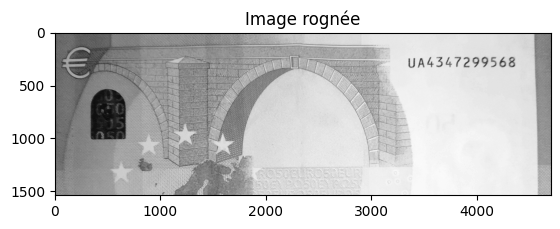

In [123]:
#
# TO COMPLETE WITH YOUR CODE
#


#### Mirror of the Image

The function [`flipud()`](https://numpy.org/doc/stable/reference/generated/numpy.flipud.html) (resp. [`fliplr()`](https://numpy.org/doc/stable/reference/generated/numpy.fliplr.html)) from *Numpy* allows obtaining a mirror image along the horizontal axis (resp. vertical axis).

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.11**

Apply a horizontal mirror effect to the "`cropped_euro`" image obtained in the previous step.

---
    
</div>

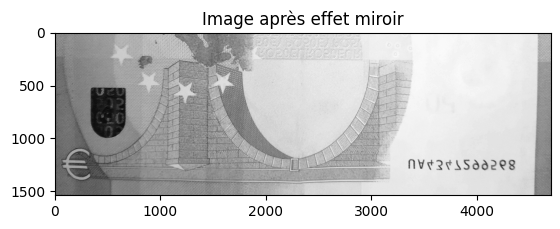

In [109]:
#
# TO COMPLETE WITH YOUR CODE
#


### Concatenate Two Images

Concatenating two images is equivalent to concatenating our two matrices with *Numpy*. The [`concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) function allows performing this operation.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.12**

Concatenate the images `cropped_euro` (above) and `flipped_euro` (below) along the horizontal axis.

---
    
</div>

True

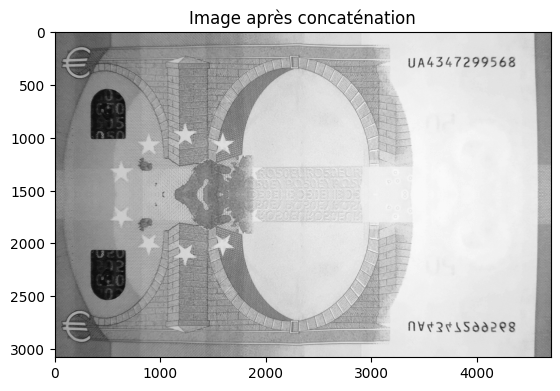

In [124]:
#
# TO COMPLETE WITH YOUR CODE
#


### Rotation of an Image

The `transform` module from *Scikit-image* offers the [`rotate()`](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.rotate) function to perform image rotations.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.13**

Apply a +90° rotation to the previously cropped image and display the resulting image.

---
    
</div>

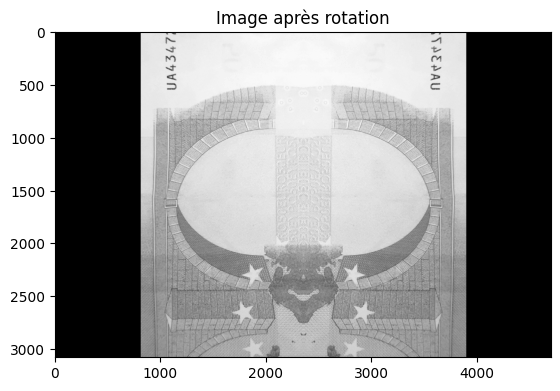

In [191]:
#
# TO COMPLETE WITH YOUR CODE
#


### Scaling an Image

The [`rescale()`](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.rescale) function from the `transform` module allows for scaling images.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 1.14**

Shrink the image by a factor of 10, then enlarge this reduced image by a factor of 2.

---
    
</div>

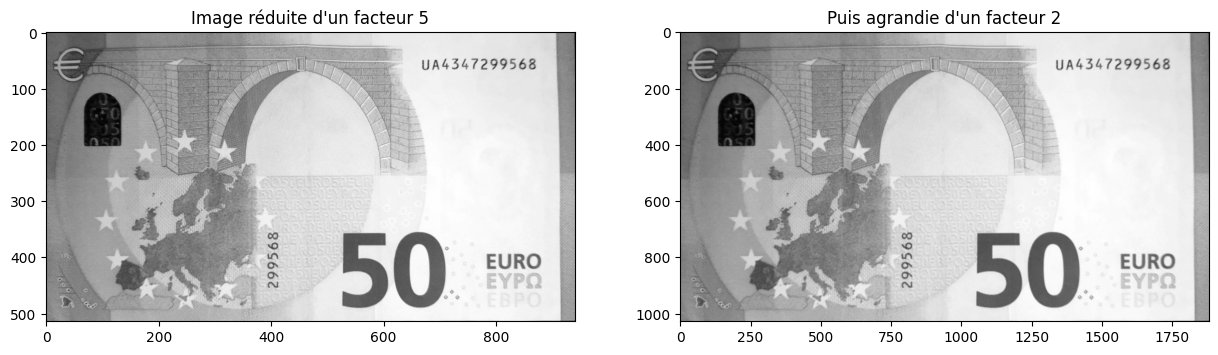

In [138]:
#
# TO COMPLETE WITH YOUR CODE
#


## 2. Color spaces and their applications

Color spaces are models that represent colors as tuples of values, typically in three or four dimensions (channels). Color spaces are crucial for understanding how colors can be represented, manipulated, and interpreted in the field of image processing. Here are three commonly used color spaces:

- **RGB** (Red, Green, Blue): This is one of the most common color spaces, where each color is represented as a combination of three primary color components: red, green, and blue.
- **HSV** (Hue, Saturation, Value) or **HSL** (Hue, Saturation, Lightness): This space is often used in applications where color definition is intuitive for the user, such as color pickers in drawing software. Hue (H) represents the color, Saturation (S) represents the vividness of the color, and Value (V) represents the brightness of the color.
- **CIE Lab**: This is a space based on human perception of colors and is designed to be device-independent, providing a measure of visual distance between colors.

Each color space has its own characteristics and is useful in different contexts of image processing. For example, the HSV color space is often used in color detection applications due to its separation between chromaticity and intensity.

### Changing Color Spaces

Changes in color spaces are often performed in image processing to facilitate certain operations.

*Scikit-image* offers a number of conversion functions in its `color` module. Thus, the function [`rgb2hsv()`](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2hsv) (or [`rgb2lab()`](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2lab)) allows converting an image in the RGB space into an image in the HSV (or CIE Lab) space.

The function `rgb2hsv()` used in the following example allows transitioning from the RGB space to the HSV (Hue-Saturation-Value) space.

```python
astronaut_hsv = color.rgb2hsv(astronaut)

figure = plt.figure(figsize=(15, 15))
figure.add_subplot(1, 4, 1)
plt.title("astronaut - RGB space")
plt.imshow(astronaut, cmap='gray'); 
figure.add_subplot(1, 4, 2)
plt.title("astronaut - HSV space")
plt.imshow(astronaut_hsv); 

blue = astronaut_hsv[:,:,0]
green = astronaut_hsv[:,:,1]
red = astronaut_hsv[:,:,2]

figure = plt.figure(figsize=(15, 15))
figure.add_subplot(1, 4, 1)
plt.title("astronaut - color")
plt.imshow(astronaut_hsv, cmap='gray'); 
figure.add_subplot(1, 4, 2)
plt.title("astronaut - hue channel")
plt.imshow(red, cmap='gray'); 
figure.add_subplot(1, 4, 3)
plt.title("astronaut - saturation channel")
plt.imshow(green, cmap='gray');
figure.add_subplot(1, 4, 4)
plt.title("astronaut - value channel")
plt.imshow(blue, cmap='gray');
```

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 2.1**

Convert the "50euros.png" image from the RGB color space to the HSV and CIE Lab color spaces, then visualize the results. Repeat with a color image of your choice.

---

</div>

In [1]:
#
# TO COMPLETE WITH YOUR CODE
#


NameError: name 'io' is not defined

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 2.2**

For the previously obtained HSV image, extract and visualize the hue, saturation, and value channels separately.

---

</div>

In [ ]:
#
# TO COMPLETE WITH YOUR CODE
#


### HSV and Color Detection

The HSV space separates color information (hue) from brightness information (value). Thus, when we want to detect a yellow object in an image, we can define a threshold (or range) for the hue (H) that corresponds to the yellow color, while ignoring variations in brightness and saturation, which would be more difficult to achieve in the RGB space.


#### Example of Extracting the Yellow Color in an Image

```python
# Convert RGB to HSV
image_hsv = rgb2hsv(image_rgb)

# Define the range for the yellow color in HSV
yellow_lower = np.array([30/360, 60/255, 100/255])  # Normalized between 0 and 1
yellow_upper = np.array([60/360, 255/255, 255/255])  # Normalized between 0 and 1
    
# Create a binary mask where yellow is True
mask_yellow = (image_hsv >= yellow_lower) & (image_hsv <= yellow_upper)

# Combine the three components
mask_yellow = mask_yellow[:,:,0] & mask_yellow[:,:,1] & mask_yellow[:,:,2]

# Use the mask to extract the yellow color from the original RGB image
yellow_output = np.zeros_like(image_rgb)
yellow_output[mask_yellow] = image_rgb[mask_yellow]


<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation No. 2.3**

Write and test the function `yellowDetection()` that allows to keep only the yellow regions of an RGB image. You will use the image "play-balls.jpg" provided in the resources for your test.

---
    
</div>

In [ ]:
def yellowDetection(image):
    #
    # TO COMPLETE WITH YOUR CODE
    #
